## Twitter analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from stargazer.stargazer import Stargazer, LineLocation
import statsmodels.formula.api as smf 
from sklearn.linear_model import LogisticRegression 

In [2]:
biden_df = pd.read_csv('biden.csv')
biden_df = biden_df.loc[biden_df['like_count'] != 0] #remove biden's retweets
biden_df

,text_content,time,like_count,retweet_count,Quarter of year,link_inculde,covid_contain,economy_mention,infrastructure_law_mention,climate_mention,china_mention
0,betty white brought a smile to the lips of gen...,2021-12-31 21:04:46+00:00,229048,21125,Q4,0,0,0,0,0,0
1,"as we head into 2022, i want folks to remember...",2021-12-31 19:28:35+00:00,21882,3631,Q4,1,0,0,0,0,0
2,"when i came into office, our economy was in cr...",2021-12-30 16:51:17+00:00,72387,10025,Q4,0,0,1,0,0,0
3,"last year at this time, there were 823,000 ame...",2021-12-30 15:43:08+00:00,37660,5777,Q4,0,0,1,0,0,0
4,"today, i committed $137 million to expanding t...",2021-12-30 03:00:29+00:00,15429,2627,Q4,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2191,we're back in the paris climate agreement.,2021-01-21 01:57:34+00:00,645421,58690,Q1,0,0,0,0,1,0
2193,after taking the oath of office this afternoon...,2021-01-20 23:03:55+00:00,486528,35262,Q1,0,1,1,0,1,0
2194,the time to move forward is now. https://t.co/...,2021-01-20 18:31:00+00:00,458753,67314,Q1,1,0,0,0,0,0
2195,there is no time to waste when it comes to tac...,2021-01-20 17:36:59+00:00,573762,73490,Q1,0,0,0,0,0,0


In [3]:
biden_df['like_count'] = [x/1000 for x in biden_df['like_count']]
biden_df['retweet_count'] = [x/1000 for x in biden_df['retweet_count']]

# make like count into binary variable, like count exceeds 50000 is Large like amounts.
biden_df.loc[biden_df['like_count']>=50,'like_binary'] = 1
biden_df.loc[biden_df['like_count']<50,'like_binary'] = 0

# rename one column into suitable form
biden_df = biden_df.rename(columns={
    'Quarter of year':'Quarter_of_year',
    'like_count':'like_count_thousand',
    'retweet_count':'retweet_count_thousand',
    'link_inculde':'link_include'
    })
biden_df

,text_content,time,like_count_thousand,retweet_count_thousand,Quarter_of_year,link_include,covid_contain,economy_mention,infrastructure_law_mention,climate_mention,china_mention,like_binary
0,betty white brought a smile to the lips of gen...,2021-12-31 21:04:46+00:00,229.048,21.125,Q4,0,0,0,0,0,0,1.0
1,"as we head into 2022, i want folks to remember...",2021-12-31 19:28:35+00:00,21.882,3.631,Q4,1,0,0,0,0,0,0.0
2,"when i came into office, our economy was in cr...",2021-12-30 16:51:17+00:00,72.387,10.025,Q4,0,0,1,0,0,0,1.0
3,"last year at this time, there were 823,000 ame...",2021-12-30 15:43:08+00:00,37.660,5.777,Q4,0,0,1,0,0,0,0.0
4,"today, i committed $137 million to expanding t...",2021-12-30 03:00:29+00:00,15.429,2.627,Q4,1,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2191,we're back in the paris climate agreement.,2021-01-21 01:57:34+00:00,645.421,58.690,Q1,0,0,0,0,1,0,1.0
2193,after taking the oath of office this afternoon...,2021-01-20 23:03:55+00:00,486.528,35.262,Q1,0,1,1,0,1,0,1.0
2194,the time to move forward is now. https://t.co/...,2021-01-20 18:31:00+00:00,458.753,67.314,Q1,1,0,0,0,0,0,1.0
2195,there is no time to waste when it comes to tac...,2021-01-20 17:36:59+00:00,573.762,73.490,Q1,0,0,0,0,0,0,1.0


### Data visualization

`histplot - like count`

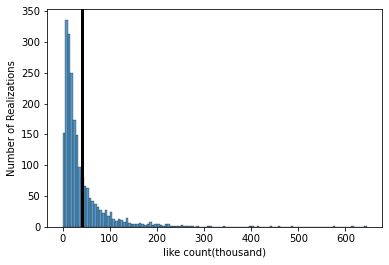

In [4]:
ax = sns.histplot(x=biden_df['like_count_thousand'])
ax.set(xlabel='like count(thousand)', ylabel='Number of Realizations')
ax.axvline(biden_df['like_count_thousand'].mean(),color='black',linewidth=3)

[Text(0.5, 0, 'like count(thousand)'), Text(0, 0.5, 'Number of Realizations')]

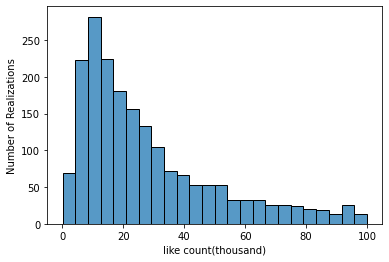

In [5]:
#look detailedly in like count less than 100 thousand where the majority of data locates
ax = sns.histplot(x=biden_df.loc[biden_df['like_count_thousand']<100]['like_count_thousand'])
ax.set(xlabel='like count(thousand)', ylabel='Number of Realizations')

`histplot - retweet count`

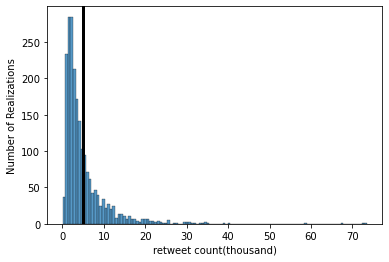

In [6]:
ax = sns.histplot(x=biden_df['retweet_count_thousand'])
ax.set(xlabel='retweet count(thousand)', ylabel='Number of Realizations')
ax.axvline(biden_df['retweet_count_thousand'].mean(),color='black',linewidth=3)

[Text(0.5, 0, 'retweet count(thousand)'),
 Text(0, 0.5, 'Number of Realizations')]

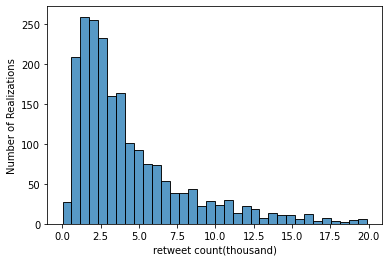

In [7]:
#look detailedly in retweet count less than 20 thousand where the majority of data locates
ax = sns.histplot(x=biden_df.loc[biden_df['retweet_count_thousand']<20]['retweet_count_thousand'])
ax.set(xlabel='retweet count(thousand)', ylabel='Number of Realizations')

`histplot - like binary`

[Text(0.5, 0, 'like binary value'), Text(0, 0.5, 'Number of Realizations')]

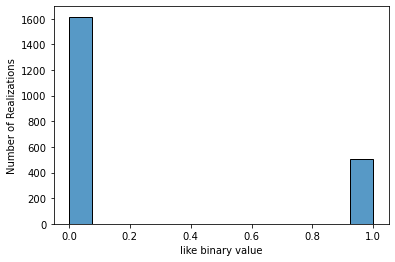

In [8]:
ax = sns.histplot(x=biden_df['like_binary'])
ax.set(xlabel='like binary value', ylabel='Number of Realizations')

`scatterplot - covid mention , like count`

[Text(0.5, 0, 'covid'), Text(0, 0.5, 'like amount')]

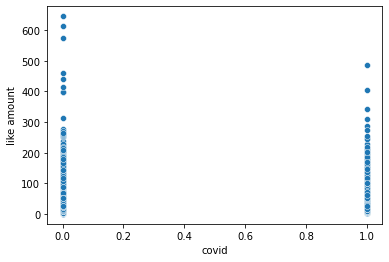

In [9]:
ax = sns.scatterplot(data = biden_df, x='covid_contain', y='like_count_thousand')
ax.set(xlabel='covid', ylabel='like amount')

`scatterplot - retweet count , like count`

[Text(0.5, 0, 'retweet amount(thousand)'),
 Text(0, 0.5, 'like amount(thousand)')]

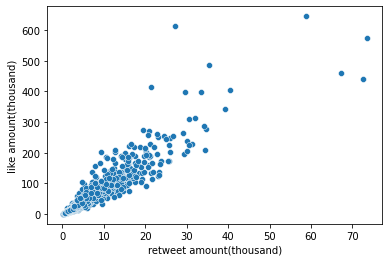

In [10]:
ax = sns.scatterplot(data = biden_df, x='retweet_count_thousand', y='like_count_thousand')
ax.set(xlabel='retweet amount(thousand)', ylabel='like amount(thousand)')

`scatterplot - economy mention , like count`

[Text(0.5, 0, 'economy'), Text(0, 0.5, 'like amount(thousand)')]

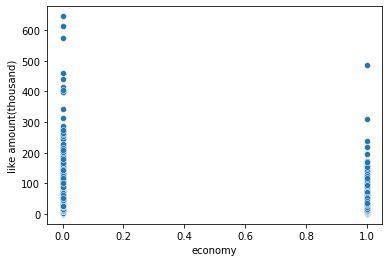

In [11]:
ax = sns.scatterplot(data = biden_df, x='economy_mention', y='like_count_thousand')
ax.set(xlabel='economy', ylabel='like amount(thousand)')

### Regression analysis

#### (1) Linear regression

##### *single predictor*

1. `like count - covid `

In [12]:
like_est = ols('like_count_thousand~covid_contain',data=biden_df).fit() 
like_est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,39.2192,1.300,30.164,0.000,36.669,41.769
covid_contain,7.6389,2.967,2.574,0.010,1.820,13.458


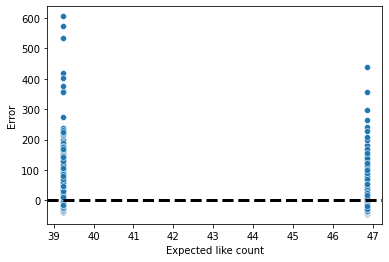

In [13]:
ax = sns.scatterplot(x=like_est.predict(),y=like_est.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected like count',ylabel='Error');

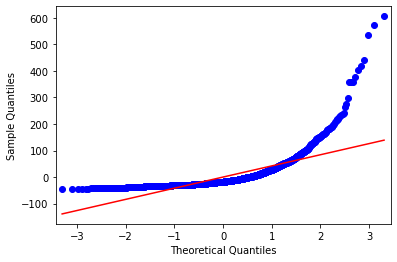

In [14]:
sm.qqplot(like_est.resid,line='r');

In [15]:
like_robust = like_est.get_robustcov_results(cov_type='HC3') 
like_robust.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,39.2192,1.261,31.094,0.000,36.746,41.693
covid_contain,7.6389,3.242,2.356,0.019,1.280,13.997


Here I study the correlation between like count of biden's tweets and whether the tweets mention covid. First I make a normal ols and found that the coefficient is significant. Second, I make a residual plot and qqplot to diagnose whether the model comply with the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed. Based on the plots, we can see that: 1) the estimated errors do not seem to be distributed around 0 with a constant standard deviation and they are dispersed; 2) the estimated errors don't lie on the straight line in qqplot. Therefore, the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed is problematic, and I choose to use robust 95% confidence interval to modify the original model. Third, from the robust result we can know that the effect of covid mention on like numbers of tweets is significant. The coefficient 7.6389 represnets the difference between like counts of tweets that mention covid related words and that do not mention covid. The expected like counts of tweets that mention covid related words is 7.6389 thousand higher than tweets that do not mention covid related words. The true effect of covid mention on like counts has 95% probability to be between 1.28 and 13.997.

2. `like count - retweet count`

In [16]:
like_est1 = ols('like_count_thousand~retweet_count_thousand',data=biden_df).fit() 
like_est1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-3.5788,0.559,-6.407,0.000,-4.674,-2.483
retweet_count_thousand,8.8656,0.074,119.958,0.000,8.721,9.011


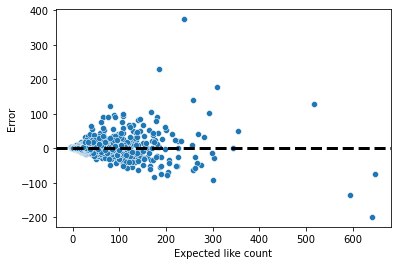

In [17]:
ax = sns.scatterplot(x=like_est1.predict(),y=like_est1.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected like count',ylabel='Error');

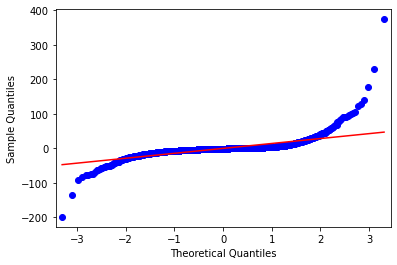

In [18]:
sm.qqplot(like_est1.resid,line='r');

In [19]:
like_robust1 = like_est1.get_robustcov_results(cov_type='HC3') 
like_robust1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-3.5788,1.459,-2.453,0.014,-6.439,-0.718
retweet_count_thousand,8.8656,0.349,25.405,0.000,8.181,9.550


Here I study the correlation between like count of biden's tweets and the retweet count. First I make a normal ols and found that the coefficient is significant. Second, I make a residual plot and qqplot to diagnose whether the model comply with the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed. Based on the plots, we can see that: 1) when the expected like count 𝐸(𝑌𝑖) are smaller, the estimated errors tend to become more smaller in magnitude; 2) the estimated errors don't lie on the straight line in qqplot. Therefore, the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed is problematic, and I choose to use robust 95% confidence interval to modify the original model. Third, from the robust result we can know that the effect of retweet number on like numbers of tweets is significant. The coefficient 8.8656 represnets that when retweet number increases one unit(one thousand), the expected like number of tweets will increase 8.8656 thousand. The true effect of retweet number on like number has 95% probability to be between 8.181 and 9.55.

##### *multiple predictors*

1. `like count - covid contain + economy mention`

In [20]:
like_est2 = ols('like_count_thousand~covid_contain+economy_mention',data=biden_df).fit() 
like_est2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,41.0641,1.470,27.934,0.000,38.181,43.947
covid_contain,6.9138,2.975,2.324,0.020,1.079,12.749
economy_mention,-7.4712,2.792,-2.676,0.008,-12.947,-1.996


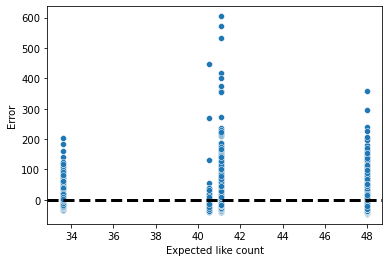

In [21]:
ax = sns.scatterplot(x=like_est2.predict(),y=like_est2.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected like count',ylabel='Error');

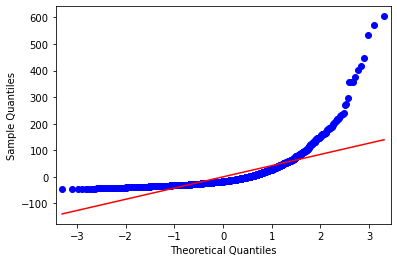

In [22]:
sm.qqplot(like_est2.resid,line='r');

In [23]:
like_robust2 = like_est2.get_robustcov_results(cov_type='HC3') 
like_robust2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,41.0641,1.571,26.146,0.000,37.984,44.144
covid_contain,6.9138,3.305,2.092,0.037,0.433,13.394
economy_mention,-7.4712,2.375,-3.145,0.002,-12.129,-2.813


Here I study the correlation between like counts of tweets and covid related words mention and economy related words mention. First I make a normal ols and found that all coefficients are significant. Second, I make a residual plot and qqplot to diagnose whether the model comply with the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed. Based on the plots, we can see that: 1) the estimated errors do not seem to be distributed around 0 with a constant standard deviation and they are highly dispersed; 2) the estimated error doesn't lie on the straight line in qqplot. Therefore, the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed is problematic, and I choose to use robust 95% confidence interval to modify the original model.

Third, from the robust result we can know that the effects of covid related words mention and economy related words mention on like counts are significant. The coefficient 6.9138 represents that when whether the tweet mentions economy related words is controlled for, if the tweets mention covid related words, the expected like count will be 6.9138 thousand higher than the tweets don't mention covid related words. The coefficient -7.4712 means that when whether the tweet mentions covid related words is controlled for, if the tweets mention economy related words, the expected like count will be 7.4712 thousand less than the tweets don't mention economy related words.

#### (2) Logistic regression

1. `like binary - retweet count`

In [24]:
like_logit = smf.logit(formula='like_binary ~ retweet_count_thousand', data=biden_df).fit() 
like_logit.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.121426
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-9.3918,0.535,-17.542,0.000,-10.441,-8.342
retweet_count_thousand,1.4615,0.088,16.604,0.000,1.289,1.634


Here I study the correlation between binary variable like and retweet number. Based on the logistic regression result, the effect of retweet number on the like odds *(high like number rate/1-high like number rate)* is significant. The coefficient 1.4615 means that when retweet number increase one unit(one thousand), the value of like odds will increase $e^{1.4615}$=4.3, revealing that the high like number rate(rate of like number >=50 thousand) will increase 330%. This true effect has 95% to be between 1.289 and 1.634.

2. `like binary - covid mention`

In [25]:
like_logit1 = smf.logit(formula='like_binary ~ covid_contain', data=biden_df).fit() 
like_logit1.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.547036
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.2282,0.058,-21.277,0.000,-1.341,-1.115
covid_contain,0.3084,0.124,2.486,0.013,0.065,0.552


Here I study the correlation between binary variable like and covid mention. Based on the logistic regression result, the effect of covid mention on the like odds *(high like number probability/1-high like number probability)* is significant. The coefficient 0.3084 means that when the tweets mention covid, the value of like odds is $e^{0.3084}$=1.36 multiple of the like odds value of tweets don't mention covid. The high like number probability of tweets mention covid is $[e^{-1.2282}/(e^{-1.2282}+1)]*[(e^{-1.2282+0.3}+1)/e^{-1.2282+0.3}]$ multiple of tweets don't mention covid. This true effect has 95% to be between 0.065 and 0.552.

#### (3) Ols regression with control variable

1. `like count - retweet count + link include`

In [26]:
like_est3 = ols('like_count_thousand~retweet_count_thousand+link_include',data=biden_df).fit() 
like_est3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-5.6480,0.800,-7.057,0.000,-7.218,-4.078
retweet_count_thousand,8.9507,0.077,115.651,0.000,8.799,9.102
link_include,3.1637,0.879,3.600,0.000,1.440,4.887


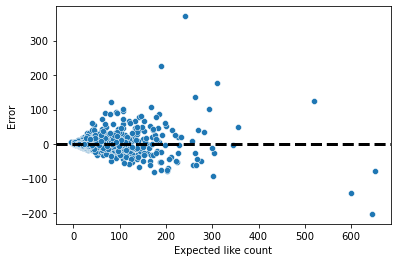

In [27]:
ax = sns.scatterplot(x=like_est3.predict(),y=like_est3.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected like count',ylabel='Error');

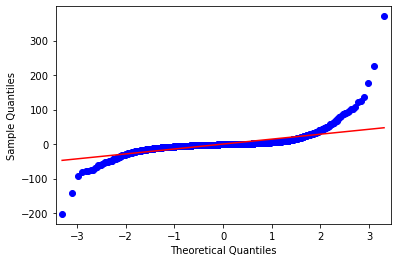

In [28]:
sm.qqplot(like_est3.resid,line='r');

In [29]:
like_robust3 = like_est3.get_robustcov_results(cov_type='HC3') 
like_robust3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-5.6480,2.361,-2.392,0.017,-10.278,-1.018
retweet_count_thousand,8.9507,0.389,22.993,0.000,8.187,9.714
link_include,3.1637,1.553,2.037,0.042,0.118,6.209


Here I study the correlation between like number of tweets and retweet number, with whether tweets contain link as control variable. First I make a normal ols and found that all coefficients are significant. Second, I make a residual plot and qqplot to diagnose whether the model comply with the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed. Based on the plots, we can see that: 1) when the expected like count 𝐸(𝑌𝑖) are smaller, the estimated errors tend to become more smaller in magnitude; 2) the estimated error doesn't lie on the straight line in qqplot. Therefore, the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed is problematic, and I choose to use robust 95% confidence interval to modify the original model.

Third, from the robust result we can know that the effects of retweet number and link contain on like number are significant. The coefficient 8.9507 represents that when whether tweets include link is controlled for, if the retweet number is one thousand higher, the expected like number will increase 8.9507 thousand. The coefficient 3.1637 represents that when the retweet number is controlled for, the difference between expected like number of tweets have link and tweets don't have link is is 3.1637, revealing that tweets have link will have 3.1637 thousand more expected like number than tweets don't have link.

#### (4) Ols regression with control variable and interaction term

1. `like count - economy mention + infrastructure law mention + economy mention*infrastructure law mention`

In [30]:
like_est4 = ols('like_count_thousand~economy_mention+infrastructure_law_mention+economy_mention*infrastructure_law_mention'
                ,data=biden_df).fit() 
like_est4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,44.7940,1.389,32.240,0.000,42.069,47.519
economy_mention,-7.5373,3.022,-2.494,0.013,-13.463,-1.612
infrastructure_law_mention,-23.3324,4.457,-5.235,0.000,-32.072,-14.592
economy_mention:infrastructure_law_mention,7.9743,7.711,1.034,0.301,-7.148,23.097


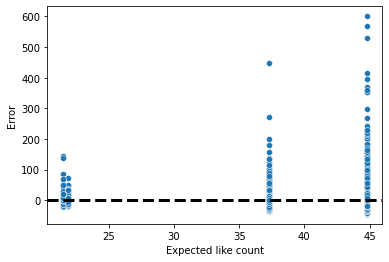

In [31]:
ax = sns.scatterplot(x=like_est4.predict(),y=like_est4.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected like count',ylabel='Error');

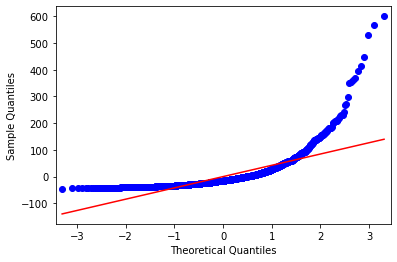

In [32]:
sm.qqplot(like_est4.resid,line='r');

In [33]:
like_robust4 = like_est4.get_robustcov_results(cov_type='HC3') 
like_robust4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,44.7940,1.544,29.017,0.000,41.767,47.821
economy_mention,-7.5373,2.670,-2.823,0.005,-12.773,-2.302
infrastructure_law_mention,-23.3324,2.337,-9.982,0.000,-27.916,-18.748
economy_mention:infrastructure_law_mention,7.9743,3.667,2.175,0.030,0.783,15.166


Here I study the correlation between like number of tweets and economy mention, infrastructure law mention and the interaction term of economy mention, infrastructure law mention. First I make a normal ols and found that coefficient of interaction term is not significant. Second, I make a residual plot and qqplot to diagnose whether the model comply with the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed. Based on the plots, we can see that: 1) the estimated errors do not seem to be distributed around 0 with a constant standard deviation and they are highly dispersed; 2) the estimated error doesn't lie on the straight line in qqplot. Therefore, the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed is problematic, and I choose to use robust 95% confidence interval to modify the original model.

Based on the robust result we can know that the coefficients of economy mention, infrastructure law mention and the interaction term are significant. This reveals that whether the tweets mention infrastructure law has effects on the relationship between whether the tweets mention economy and like number of tweets. The coefficient -7.5373 means that when the tweets don't mention infrastructure law, the expected like number of tweets that mention economy will be 7.5373 thousand lower than the like number of tweets that don't mention economy. The coefficient -23.3324 means that when the tweets don't mention economy, the expected like number of tweets that mention infrastructure law is 23.3324 thousand lower than that of tweets that don't mention infrastructure law. The interaction coefficient 7.9743 means that when the tweets mention infrastructure law, the effect of mentioning economy on tweets' like number will increase 7.9743, from -7.5373 to 0.437(-7.5373+7.9743). Now the expected like number of tweets that mention economy will be 0.437 thousand more than that of tweets that don't mention economy. This effect can be inferred by the content of the infrastructure law, which was claimed to increase the employment.

#### (5) Ols regression with non-binary categorical variable

1. `like count - quarter`

In [34]:
like_est5 = ols('like_count_thousand~C(Quarter_of_year)',data=biden_df).fit()
like_est5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,73.1793,2.465,29.689,0.000,68.345,78.013
C(Quarter_of_year)[T.Q2],-32.1281,3.291,-9.763,0.000,-38.582,-25.675
C(Quarter_of_year)[T.Q3],-39.9495,3.295,-12.125,0.000,-46.411,-33.488
C(Quarter_of_year)[T.Q4],-49.2173,3.225,-15.260,0.000,-55.542,-42.892


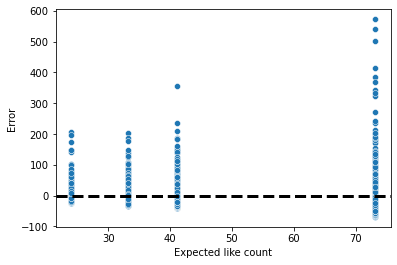

In [35]:
ax = sns.scatterplot(x=like_est5.predict(),y=like_est5.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected like count',ylabel='Error');

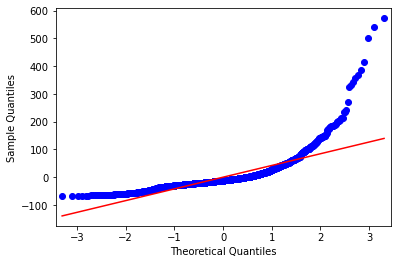

In [36]:
sm.qqplot(like_est5.resid,line='r');

In [37]:
like_robust5 = like_est5.get_robustcov_results(cov_type='HC3') 
like_robust5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,73.1793,4.252,17.212,0.000,64.841,81.517
C(Quarter_of_year)[T.Q2],-32.1281,4.687,-6.854,0.000,-41.320,-22.936
C(Quarter_of_year)[T.Q3],-39.9495,4.495,-8.887,0.000,-48.765,-31.134
C(Quarter_of_year)[T.Q4],-49.2173,4.386,-11.221,0.000,-57.819,-40.615


Here I study the correlation between like count of tweets and a non-binary catigorical variable, quarter of the tweets' created time. First I make a dummy ols and found that all dummy coefficients are significant. Second, I make a residual plot and qqplot to diagnose whether the model comply with the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed. Based on the plots, we can see that: 1)  the estimated errors do not seem to be distributed around 0 with a constant standard deviation and they are highly dispersed; 2) the estimated error doesn't lie on the straight line in qqplot. Therefore, the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed is problematic, and I choose to use robust 95% confidence interval to modify the original model.

From the robust result we can see that all coefficients are significant. The intercept 73.1793 means that when the tweet is sent in the first quarter, the expected like number of tweets is 73.1793 thousand. The coefficient -32.1281 means that tweets sent in the second quarter have 32.1281 less expected like number than than those sent in the first quarter. The coefficient -39.9495 means that tweets sent in the third quarter have 39.9495 less expected like number than than those sent in the first quarter. The coefficient -49.2173 means that tweets sent in the fourth quarter have 49.2173 less expected like number than than those sent in the first quarter. We can know that the as the time went by, the expected like number of biden's tweets by quarter was decreasing.

2. `binary like - quarter`

In [38]:
like_logit2 = smf.logit(formula='like_binary ~ C(Quarter_of_year)', data=biden_df).fit() 
like_logit2.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.506621
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.1686,0.097,-1.738,0.082,-0.359,0.022
C(Quarter_of_year)[T.Q2],-0.8794,0.138,-6.393,0.000,-1.149,-0.610
C(Quarter_of_year)[T.Q3],-1.2857,0.146,-8.791,0.000,-1.572,-0.999
C(Quarter_of_year)[T.Q4],-1.9761,0.165,-11.994,0.000,-2.299,-1.653


Here I study the correlation between binary like and a non-binary catigorical variable, quarter of the tweets' created time. Based on the logistic regression result, the effect of tweets' created time on the like odds *(high like number rate/1-high like number rate)* is significant. The intercept -0.1686 means that when the tweet is sent in the first, the value of like odds is $e^{-0.1686}$=0.84. The coefficient -0.8794 means that the like odds of tweets sent in the first quarter is 2.4 multiple of the like odds of tweets sent in the second quarter. The coefficient -1.2857 means that the like odds of tweets sent in the first quarter is 3.62 multiple of the like odds of tweets sent in the third quarter. The coefficient -1.9761 means that the like odds of tweets sent in the first quarter is 7.2 multiple of the like odds of tweets sent in the fourth quarter. We can infer from this that as time went by, the probability that biden's tweets could gain over 50000 likes by quarter was decreasing.

#### (6) Log

After I test the models with polynomial and Log, I find that taking log in my models is an ideal approach to adjust the models. Based on the residual plots and qqplots, most of models I run above have problems with the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed. I think one significant reason is that the like number of tweets are in large number level and the numbers are widly dispersed. This can cause heteroscedasticity. In this case, using Log is a good way to solve the problem. Below are some log models I conduct.

1. `log(like count) - covid contain`

In [39]:
like_est_log = ols('np.log(like_count_thousand)~covid_contain',data=biden_df).fit() 
like_log_robust = like_est_log.get_robustcov_results(cov_type='HC3') 
like_log_robust.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.1544,0.024,129.790,0.000,3.107,3.202
covid_contain,0.1239,0.058,2.134,0.033,0.010,0.238


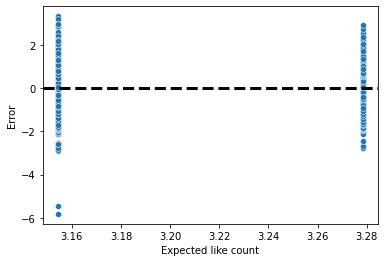

In [40]:
ax = sns.scatterplot(x=like_est_log.predict(),y=like_est_log.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected like count',ylabel='Error');

The result shows that the coefficient is significant, and now the residual plot is much better than before and looks comply with 𝑆𝐷(𝜖𝑖)=𝜎. The coefficient 0.1239 means that like number of tweets which contain covid related words will be 12.39% more than that of tweets which don't contain covid words.

2. `log(like count) - log(retweet count)`

In [41]:
like_est_log2 = ols('np.log(like_count_thousand)~np.log(retweet_count_thousand)',data=biden_df).fit() 
like_log_robust2 = like_est_log2.get_robustcov_results(cov_type='HC3') 
like_log_robust2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.8188,0.008,242.045,0.000,1.804,1.834
np.log(retweet_count_thousand),1.1251,0.006,184.375,0.000,1.113,1.137


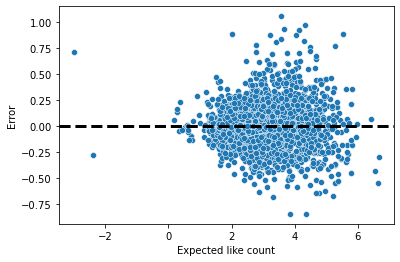

In [42]:
ax = sns.scatterplot(x=like_est_log2.predict(),y=like_est_log2.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected like count',ylabel='Error');

The result shows that the coefficient is significant, and now the residual plot looks comply with 𝑆𝐷(𝜖𝑖)=𝜎. The coefficient 1.1251 means that if the retweet number increases 1%, the like number will increase 1.1251%.

3. `log(like count) - log(retweet count) + link include`

In [43]:
like_est_log3 = ols('np.log(like_count_thousand)~np.log(retweet_count_thousand)+link_include',data=biden_df).fit() 
like_log_robust3 = like_est_log3.get_robustcov_results(cov_type='HC3') 
like_log_robust3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.8320,0.013,142.987,0.000,1.807,1.857
np.log(retweet_count_thousand),1.1213,0.007,150.933,0.000,1.107,1.136
link_include,-0.0166,0.012,-1.405,0.160,-0.040,0.007


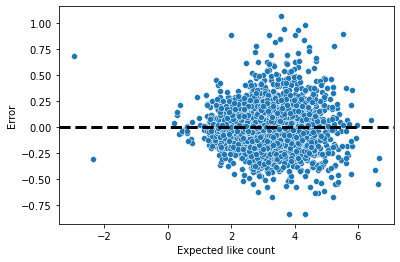

In [44]:
ax = sns.scatterplot(x=like_est_log3.predict(),y=like_est_log3.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected like count',ylabel='Error');

Although the residual plot looks ideal, the coefficient of link becomes insignificant after I take the log of both like count and retweet count. We can see that although I use robust regression before, the heteroscedasticity may still have effect in the model so that it affects the significance of link's coefficient.

4. `log(like count) - log(retweet count) + covid contain`

In [45]:
like_est_log4 = ols('np.log(like_count_thousand)~np.log(retweet_count_thousand)+covid_contain',data=biden_df).fit() 
like_log_robust4 = like_est_log4.get_robustcov_results(cov_type='HC3') 
like_log_robust4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.8224,0.008,234.442,0.000,1.807,1.838
np.log(retweet_count_thousand),1.1257,0.006,183.779,0.000,1.114,1.138
covid_contain,-0.0225,0.011,-2.009,0.045,-0.044,-0.001


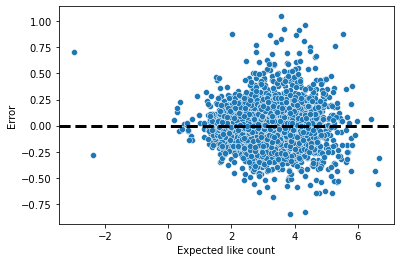

In [46]:
ax = sns.scatterplot(x=like_est_log4.predict(),y=like_est_log4.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected like count',ylabel='Error');

When I use robust regression to study correlation between like and retweet and covid contain as control variable, the coefficient of covid contain is insignificant. However, when I take the log, this effect is significant. The coefficient 1.1257 means that when covid contain is controlled, 1% increase of retweet amount will be associated with 1.1257% increase of like amount. The coefficient -0.0225 means that when retweet amount is controlled for, the tweets that mention covid words will have 2.25% less like number than those don't mention. 

5. `log(like count) - economy_mention+infrastructure_law_mention+economy_mention*infrastructure_law_mention`

In [47]:
like_est_log5 = ols('np.log(like_count_thousand)~economy_mention+infrastructure_law_mention+ \
                    economy_mention*infrastructure_law_mention',data=biden_df).fit() 
like_log_robust5 = like_est_log5.get_robustcov_results(cov_type='HC3') 
like_log_robust5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.2437,0.027,118.431,0.000,3.190,3.297
economy_mention,-0.0589,0.055,-1.077,0.282,-0.166,0.048
infrastructure_law_mention,-0.5059,0.074,-6.800,0.000,-0.652,-0.360
economy_mention:infrastructure_law_mention,0.1645,0.116,1.414,0.158,-0.064,0.393


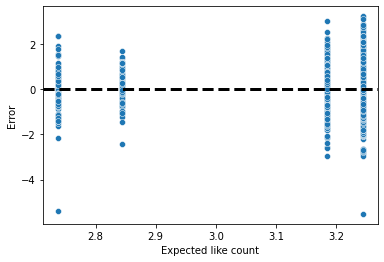

In [48]:
ax = sns.scatterplot(x=like_est_log5.predict(),y=like_est_log5.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected like count',ylabel='Error');

Although the residual plot becomes more ideal, the effect of infrastructure law mention on the relation between economy mention and like count is insignificant after I take the log of like count.

6. `log(like count) - log(retweet_count_thousand)+link_include+log(retweet_count_thousand)*link_include`

In [49]:
like_est_log6 = ols('np.log(like_count_thousand)~np.log(retweet_count_thousand)+  \
                    link_include+np.log(retweet_count_thousand)*link_include',data=biden_df).fit() 
like_log_robust6 = like_est_log6.get_robustcov_results(cov_type='HC3') 
like_log_robust6.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.9031,0.015,129.131,0.000,1.874,1.932
np.log(retweet_count_thousand),1.0762,0.009,119.176,0.000,1.059,1.094
link_include,-0.1319,0.017,-7.765,0.000,-0.165,-0.099
np.log(retweet_count_thousand):link_include,0.0960,0.014,6.698,0.000,0.068,0.124


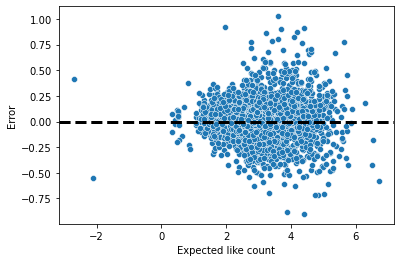

In [50]:
ax = sns.scatterplot(x=like_est_log6.predict(),y=like_est_log6.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected like count',ylabel='Error');

After I take the log, I find that whether the tweets have links have significant effect on the relation between retweet and like number. The residual plot looks good. The coefficient 1.0762 means that when the tweets don't have links, 1% increase of retweet number will be associated with 1.0762% increase of like number. The coefficient of interaction term 0.096 means that when the tweets include links, the effect of retweet number on like number will become 1.0762+0.096=1.1722, representing that 1% increase of retweet number will be associated with 1.1722% increase of like number if the tweets have links.

7. `log(like count) - Quarter of year`

In [51]:
like_est_log7 = ols('np.log(like_count_thousand)~C(Quarter_of_year)',data=biden_df).fit()
like_log_robust7 = like_est_log7.get_robustcov_results(cov_type='HC3') 
like_log_robust7.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.8033,0.047,80.659,0.000,3.711,3.896
C(Quarter_of_year)[T.Q2],-0.5766,0.064,-9.067,0.000,-0.701,-0.452
C(Quarter_of_year)[T.Q3],-0.7183,0.062,-11.509,0.000,-0.841,-0.596
C(Quarter_of_year)[T.Q4],-1.0301,0.060,-17.263,0.000,-1.147,-0.913


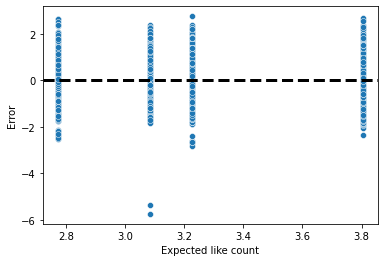

In [52]:
ax = sns.scatterplot(x=like_est_log7.predict(),y=like_est_log7.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected like count',ylabel='Error');

After taking the log of like count, the residual plot of this model becomes much better and the coefficients are still significant. The intercept 3.8 means that the expected log of like number in quarter one is 3.8. The coefficient -0.5766 means that the like number in quarter two is 57.66% less than quarter one. The coefficient -0.7183 means that the like number in quarter three is 71.83% less than quarter one. The coefficient -1.0301 means that the like number in quarter four is 103.01% less than quarter one.